In [49]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

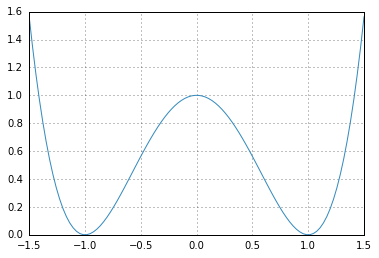

In [20]:
x = np.linspace(-1.5, 1.5, 100)
E = (x-1)**2*(x+1)**2
#F = -2*((x-1)*(x+1)**2 + (x-1)**2*(x+1))
plt.plot(x,E)
#plt.plot(x,F)

$$
\frac{dp(x,t)}{dt} = - \frac{d}{dx} (\nabla U(x) p(x,t)) + \Delta p(x,t)
$$

$$
\frac{dp(x,t)}{dt} = \frac{d}{dx} (F(x) \, p(x,t)) + \frac{d^2}{dx^2} p(x,t)
$$

In [18]:
# dp[i]/dt = (F[i+1]*p[i+1] - F[i-1]*p[i-1])/(2*dx) + (p[i-1] + -2*p[i] + p[i+1])/dx**2

In [507]:
N = 200
x = np.linspace(-3, 3, N)
E = (x-1)**2*(x+1)**2

A = np.zeros((N, N))
for i in range(N):
    p_f = np.exp(-(E[i+1]-E[i])) if i < N-1 else 0
    p_b = np.exp(-(E[i-1]-E[i])) if i > 0 else 0
    p_s = 1
    z = (p_f + p_s + p_b)
    p_f = p_f / z
    p_s = p_s / z
    p_b = p_b / z

    if i < N-1:
        A[i+1, i] = p_f
    A[i, i] = p_s
    if i > 0:
        A[i-1, i] = p_b

In [508]:
w, VL, VR = scipy.linalg.eig(A, left=True, right=True)
w = np.real(w)
#print(np.sort(w)[-10:])
print(np.argsort(w))

[ 77  78  79  80  81  82  87  88  91  92  93  94 102 103 106 107 108 111
 116 119 120 124 125 126 130 133 137 136 128 127 134 135 145 123 122 146
 147 164 118 117 151 152 157 175 114 115 169 185 188 187 186 112 113 189
 177 193 178 110 109 176 196 165 166 199 104 105 167 179 174 198 100 101
 160 159 168 197 162 161  98  99 173 195 172  96  95 183 184 182 190  89
  90 181 180 170 171  86  85 150 149 158 192 194 163  75  76 143 144 148
 191  73  74 154 156 155 142  68  69 153 141 140  67  66 139 138 132 131
  64  65 129 121  62  63  97  83  84  72  70  71  60  61  59  58  55  56
  57  54  53  52  48  50  51  49  47  46  45  44  39  41  43  42  40  38
  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22  21  20
  19  18  17  16  15  14  13  12  11  10   9   8   7   6   5   4   3   2
   1   0]


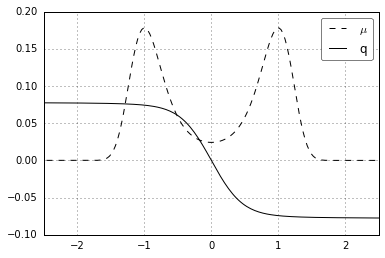

In [509]:
mu = VR[:,0]
q = VL[:,1]
plt.plot(x, mu, '--k', label='$\mu$')
plt.plot(x, q, c='k', label='q')
plt.xlim(-2.5,2.5)
plt.legend()

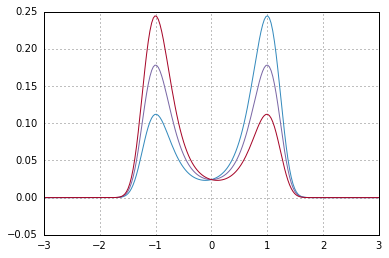

In [520]:
for coeff in np.linspace(-5,5,3):
    plt.plot(x, mu + coeff* q * mu)

In [511]:
VR

array([[ -2.03427464e-18+0.j,   8.82094326e-19+0.j,   1.21088441e-18+0.j,
        ...,  -6.09561533e-18+0.j,  -1.24608053e-18+0.j,
          7.18318791e-18+0.j],
       [ -1.16971965e-17+0.j,   1.61422122e-17+0.j,   9.58867111e-18+0.j,
        ...,  -2.09384778e-17+0.j,  -1.41692389e-17+0.j,
         -2.07617285e-17+0.j],
       [ -3.77091642e-17+0.j,   5.59698854e-17+0.j,  -8.11200096e-17+0.j,
        ...,   9.90730274e-17+0.j,  -1.86565653e-17+0.j,
          2.64905499e-17+0.j],
       ..., 
       [ -5.07719319e-31+0.j,   5.42566365e-31+0.j,   8.57820740e-31+0.j,
        ...,  -2.18054080e-25+0.j,   7.57001103e-27+0.j,
          1.36585697e-25+0.j],
       [ -3.05011098e-32+0.j,   3.25944685e-32+0.j,   5.15314016e-32+0.j,
        ...,  -8.63079891e-27+0.j,   5.11248855e-28+0.j,
         -9.33648689e-28+0.j],
       [ -1.01788392e-33+0.j,   1.08774306e-33+0.j,   1.71969353e-33+0.j,
        ...,   1.22545746e-28+0.j,   2.23685365e-28+0.j,
          4.28236923e-28+0.j]])